<a href="https://colab.research.google.com/github/Neha-Seirah/DAA-/blob/main/DAA_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Graph coloring is a well-known problem in mathematics and computer science that entails giving vertices in a graph different colors so that no two adjacent vertices have the same color. There is no known polynomial-time algorithm for solving the Graph Coloring Problem in the general case, as it is known to be NP-hard. Backtracking, on the other hand, is a popular method for solving problems that involves methodically examining every potential solution.

How the graph coloring problem is resolved by backtracking:

The algorithm tries various color assignments for each vertex in order to systematically explore the solution space. When it comes across an issue for which there isn't a workable solution with the options available, it goes back to the last decision point and considers other options. This process keeps going until a legitimate coloring is discovered or every option is investigated.

**IMPLEMENTATION**

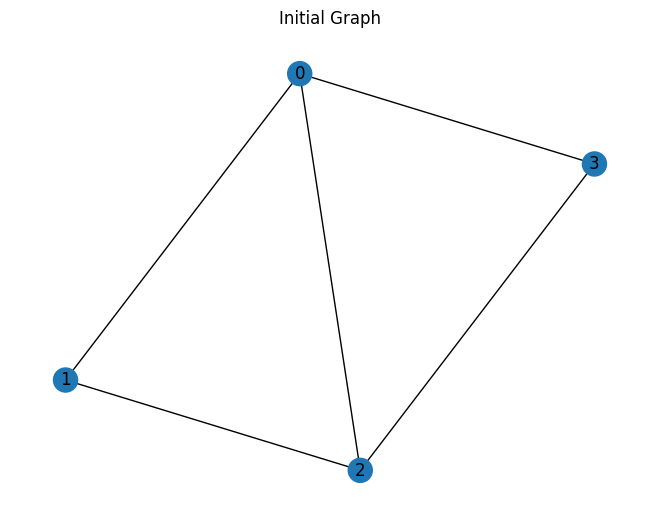

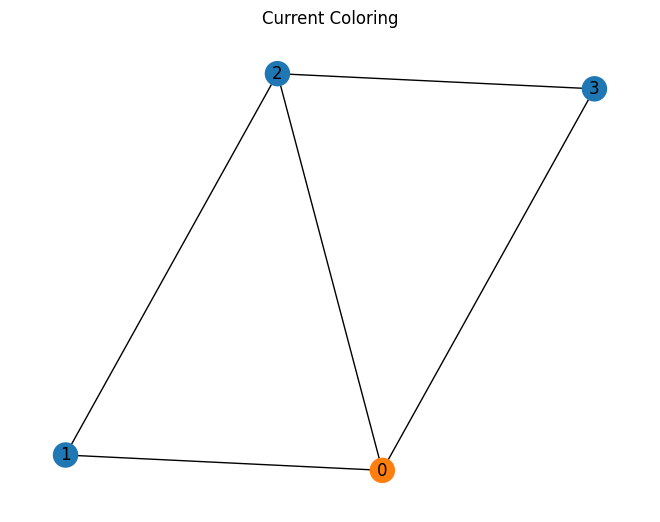

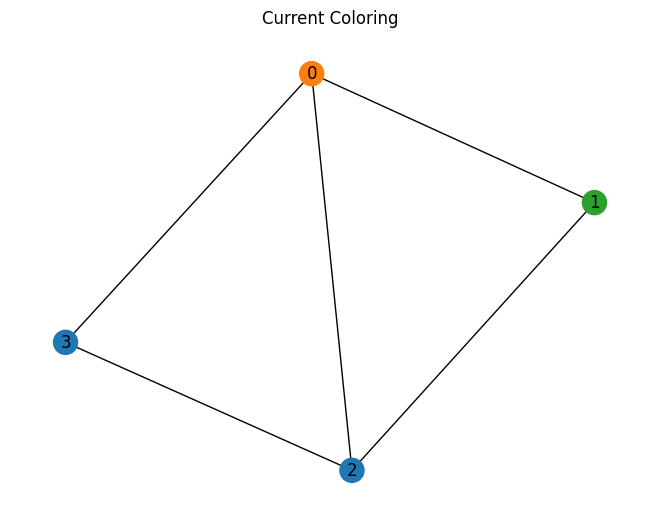

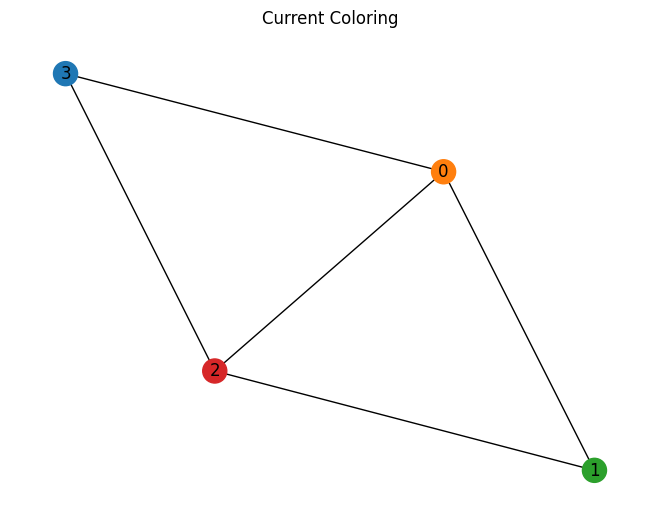

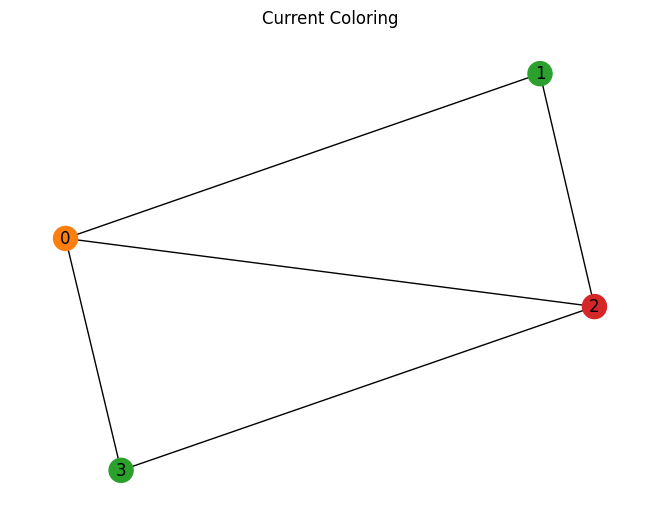

Minimum number of colors required: 3
Final Color Assignment:
Vertex 1: Color 1
Vertex 2: Color 2
Vertex 3: Color 3
Vertex 4: Color 2


In [5]:
#Utilizing  the libraries for graph visualization.
import networkx as nx
import matplotlib.pyplot as plt

 #Implement a class or a set of functions to represent the graph coloring
class Graph:
    def __init__(self, vertices):
        self.vertices = vertices
        self.graph = [[0] * vertices for _ in range(vertices)]

    def is_safe(self, v, c, color):
        for i in range(self.vertices):
            if self.graph[v][i] == 1 and color[i] == c:
                return False
        return True

    def graph_coloring_util(self, m, color, v, result, graph_visualization):
        if v == self.vertices:
            result.append(color[:])  # Store the current coloring
            return True

        for c in range(1, m + 1):
            if self.is_safe(v, c, color):
                color[v] = c

                # Update graph visualization at each step and back tracking
                self.update_graph_visualization(graph_visualization, color)

                if self.graph_coloring_util(m, color, v + 1, result, graph_visualization):
                    return True

                color[v] = 0  # Backtrack if no color is possible

    def graph_coloring(self, m):
        color = [0] * self.vertices
        result = []

        # Create a graph for visualization
        graph_visualization = nx.Graph()
        graph_visualization.add_nodes_from(range(self.vertices))
        graph_visualization.add_edges_from(self.get_edges())

        # Initial graph visualization
        self.visualize_graph(graph_visualization, color)

        if not self.graph_coloring_util(m, color, 0, result, graph_visualization):
            print("Solution does not exist")
            return None

        # Display the minimum number of colors required
        min_colors = max(result[-1])
        print(f"Minimum number of colors required: {min_colors}")

        # Display the final color assigned to each vertex
        print("Final Color Assignment:")
        for v, c in enumerate(result[-1]):
            print(f"Vertex {v + 1}: Color {c}")

        return result

    def update_graph_visualization(self, graph_visualization, color):
        plt.pause(0.5)  # Pause for visualization (adjust as needed)

        # Clear previous colors
        node_colors = ['#ffffff'] * self.vertices

        # Assign colors to vertices
        for v, c in enumerate(color):
            node_colors[v] = f'C{c}'

        # Update node colors in the visualization
        nx.draw(graph_visualization, with_labels=True, node_color=node_colors, font_color='black')
        plt.title("Current Coloring")
        plt.show()

    def visualize_graph(self, graph_visualization, color):
        # Clear previous colors
        node_colors = ['#ffffff'] * self.vertices

        # Assign colors to vertices
        for v, c in enumerate(color):
            node_colors[v] = f'C{c}'

        # Visualize the initial graph
        nx.draw(graph_visualization, with_labels=True, node_color=node_colors, font_color='black')
        plt.title("Initial Graph")
        plt.show()

    def get_edges(self):
        edges = []
        for i in range(self.vertices):
            for j in range(i + 1, self.vertices):
                if self.graph[i][j] == 1:
                    edges.append((i, j))
        return edges


# Example usage:
if __name__ == "__main__":
    # Create a sample graph
    g = Graph(4)
    g.graph = [[0, 1, 1, 1],
               [1, 0, 1, 0],
               [1, 1, 0, 1],
               [1, 0, 1, 0]]

    # Number of colors
    num_colors = 3


    # Get the possible colorings
    colorings = g.graph_coloring(num_colors)


 Minimum Colors Output AND the final color assigned to each vertex in the graph is mentioned above
